In [1]:
import statsbombpy
from statsbombpy import sb

import pandas as pd
import math
import matplotlib.pyplot as plt

import seaborn as sns

# function

In [2]:
def plot_pitch() :
    
    fig,ax = plt.subplots(figsize=(10.4,6.8))
    ax.axis('off') # this hides the x and y ticks
    
    ly1 = [0,0,68,68,0]
    lx1 = [0,104,104,0,0]
    
    plt.plot(lx1,ly1,color="black",zorder=5)
    
    ly2 = [13.84,13.84,54.16,54.16] 
    lx2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color="black",zorder=5)

    ly3 = [13.84,13.84,54.16,54.16] 
    lx3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color="black",zorder=5)
    
    #goals#
    ly4 = [30.34,30.34,37.66,37.66]
    lx4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color="black",zorder=5)

    ly5 = [30.34,30.34,37.66,37.66]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black",zorder=5)
    
    #6 yard boxes#
    ly6 = [24.84,24.84,43.16,43.16]
    lx6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color="black",zorder=5)

    ly7 = [24.84,24.84,43.16,43.16]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black",zorder=5)
    
    

    #Halfway line, penalty spots, and kickoff spot

    vcy5 = [0,68] 
    vcx5 = [52,52]
    plt.plot(vcx5,vcy5,color="black",zorder=5)


    plt.scatter(93,34,color="black",zorder=5)
    plt.scatter(11,34,color="black",zorder=5)
    plt.scatter(52,34,color="black",zorder=5)
    
    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=2,alpha=1)
    
    circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color="black", fill=False, zorder=2,alpha=1)



    ## Rectangles in boxes
    rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color="white", zorder=1,alpha=1)
    rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color="white", zorder=1,alpha=1)



    ## Pitch rectangle

    #rec3 = plt.Rectangle((-1,-1), 106,70,color=pitch,zorder=1,alpha=1)



    #ax.add_artist(rec3)
    #ax.add_artist(circle1)
    #ax.add_artist(circle2)
    #ax.add_artist(rec1)
    #ax.add_artist(rec2)

    ax.add_artist(circle3)

    #we defined ax after we imported matplotlib.pyplot#

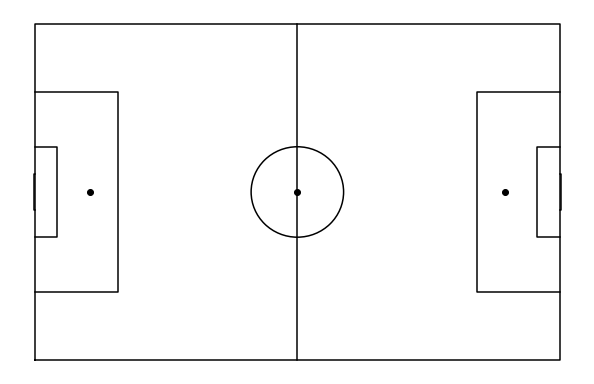

In [3]:
plot_pitch()
plt.show()

In [4]:
def heatmap_pass_under_pressure(player_name, df_events, season) :

    #receipt passes with presure
    ball_receipt_up = df_events[(df_events['ball_receipt'] != 'Incomplete') &
                   (df_events['under_pressure'] == True) &
                   (df_events['player'] == player_name)]

    #receipt passes location
    ball_receipt_up_x = pd.Series(index = ball_receipt_up.index)
    ball_receipt_up_y = pd.Series(index = ball_receipt_up.index)
    for i in ball_receipt_up.index :
        ball_receipt_up_x.loc[i] = ball_receipt_up.location.loc[i][0] *104/120
        ball_receipt_up_y.loc[i] = ball_receipt_up.location.loc[i][1] *68/80

    #update locations to plot receipt passes rightly on the pitch on y axis

    #0 -> 68 en largeur
    #0 --> 104 en longueur

    #données
    #0 --> 80
    #0 --> 120
    ball_receipt_up_y = 68 - ball_receipt_up_y

    plot_pitch()
    #plt.scatter(ball_receipt_np_x, ball_receipt_np_y)
    sns.kdeplot(ball_receipt_up_x,ball_receipt_up_y, shade="True", n_levels=50, color = 'green')
    plt.ylim(0, 68)
    plt.xlim(0, 104)
    
    plt.title('{}\'s position to receive passes under pressure - season {}'.format(player_name, season))

In [5]:
def heatmap_pass_no_pressure(player_name, df_events, season) :
    
    ball_receipt_np =df_events[(df_events['ball_receipt'] != 'Incomplete') &
               (df_events['under_pressure'] != True) &
               (df_events['player'] == player_name)]

    #receipt passes location
    ball_receipt_np_x = pd.Series(index = ball_receipt_np.index)
    ball_receipt_np_y = pd.Series(index = ball_receipt_np.index)



    for i in ball_receipt_np.index :
        if type(ball_receipt_np.location.loc[i]) == list :
            ball_receipt_np_x.loc[i] = ball_receipt_np.location.loc[i][0]
            ball_receipt_np_y.loc[i] = ball_receipt_np.location.loc[i][1]

    ball_receipt_np_x = ball_receipt_np_x.dropna()
    ball_receipt_np_y = ball_receipt_np_y.dropna()

    ball_receipt_np_x = ball_receipt_np_x *104/120
    ball_receipt_np_y = ball_receipt_np_y *68/80

    #update locations to plot receipt passes rightly on the pitch on y axis

    #pitch created
    #0 -> 68 for y axis
    #0 --> 104 for x axis

    #data
    #0 --> 80 for y axis
    #0 --> 120 for x axis
    ball_receipt_np_y = 68 - ball_receipt_np_y


    plot_pitch()
    #plt.scatter(ball_receipt_np_x, ball_receipt_np_y)
    sns.kdeplot(ball_receipt_np_x,ball_receipt_np_y, shade="True", n_levels=50, color = 'green')
    plt.ylim(0, 68)
    plt.xlim(0, 104)
    
    plt.title('{}\'s position to receive passes without pressure - season {}'.format(player_name, season))

# analysis

In [6]:
competitions = sb.competitions()
la_liga = competitions[competitions.competition_name == 'La Liga']
la_liga.head()

credentials were not supplied. open data access only


competition_id  season_id country_name competition_name competition_gender  \
3              11          4        Spain          La Liga               male   
4              11          1        Spain          La Liga               male   
5              11          2        Spain          La Liga               male   
6              11         27        Spain          La Liga               male   
7              11         26        Spain          La Liga               male   

  season_name               match_updated             match_available  
3   2018/2019  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
4   2017/2018  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
5   2016/2017  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
6   2015/2016  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756  
7   2014/2015  2019-12-16T23:09:16.168756  2019-12-16T23:09:16.168756

In [7]:
la_liga

competition_id  season_id country_name competition_name  \
3               11          4        Spain          La Liga   
4               11          1        Spain          La Liga   
5               11          2        Spain          La Liga   
6               11         27        Spain          La Liga   
7               11         26        Spain          La Liga   
8               11         25        Spain          La Liga   
9               11         24        Spain          La Liga   
10              11         23        Spain          La Liga   
11              11         22        Spain          La Liga   
12              11         21        Spain          La Liga   
13              11         41        Spain          La Liga   
14              11         40        Spain          La Liga   
15              11         39        Spain          La Liga   
16              11         38        Spain          La Liga   
17              11         37        Spain          La Liga   

   competition_gender season_name               match_updated  \
3                male   2018/2019  2019-12-16T23:09:16.168756   
4                male   2017/2018  2019-12-16T23:09:16.168756   
5                male   2016/2017  2019-12-16T23:09:16.168756   
6                male   2015/2016  2019-12-16T23:09:16.168756   
7                male   2014/2015  2019-12-16T23:09:16.168756   
8                male   2013/2014  2019-12-16T23:09:16.168756   
9                male   2012/2013  2019-12-16T23:09:16.168756   
10               male   2011/2012  2019-12-16T23:09:16.168756   
11               male   2010/2011  2019-12-16T23:09:16.168756   
12               male   2009/2010  2019-12-16T23:09:16.168756   
13               male   2008/2009  2019-12-16T23:09:16.168756   
14               male   2007/2008  2019-12-16T23:09:16.168756   
15               male   2006/2007  2019-12-16T23:09:16.168756   
16               male   2005/2006  2019-12-16T23:09:16.168756   
17               male   2004/2005  2019-12-16T23:09:16.168756   

               match_available  
3   2019-12-16T23:09:16.168756  
4   2019-12-16T23:09:16.168756  
5   2019-12-16T23:09:16.168756  
6   2019-12-16T23:09:16.168756  
7   2019-12-16T23:09:16.168756  
8   2019-12-16T23:09:16.168756  
9   2019-12-16T23:09:16.168756  
10  2019-12-16T23:09:16.168756  
11  2019-12-16T23:09:16.168756  
12  2019-12-16T23:09:16.168756  
13  2019-12-16T23:09:16.168756  
14  2019-12-16T23:09:16.168756  
15  2019-12-16T23:09:16.168756  
16  2019-12-16T23:09:16.168756  
17  2019-12-16T23:09:16.168756

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

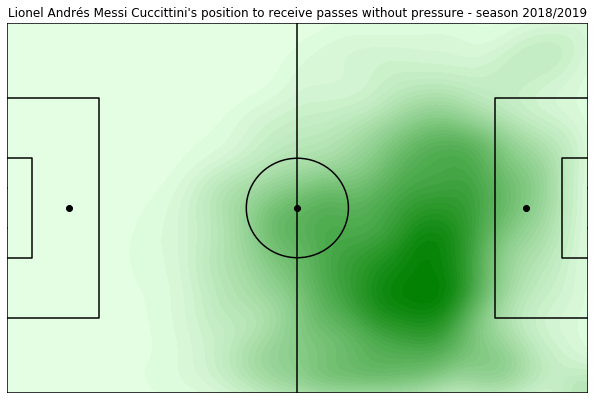

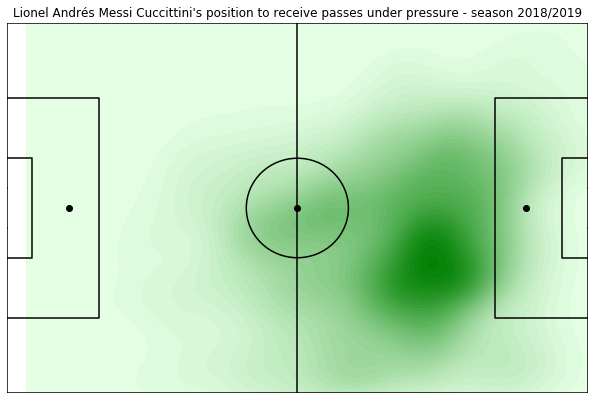

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

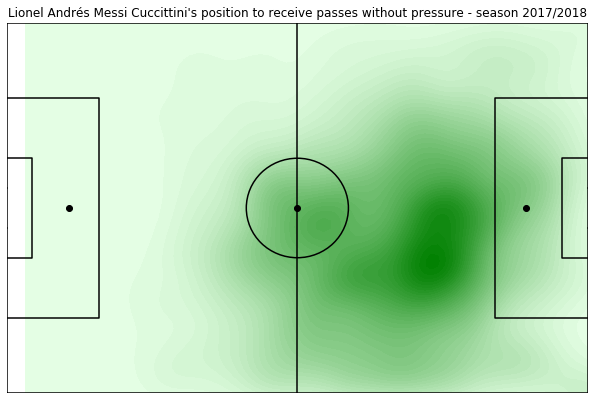

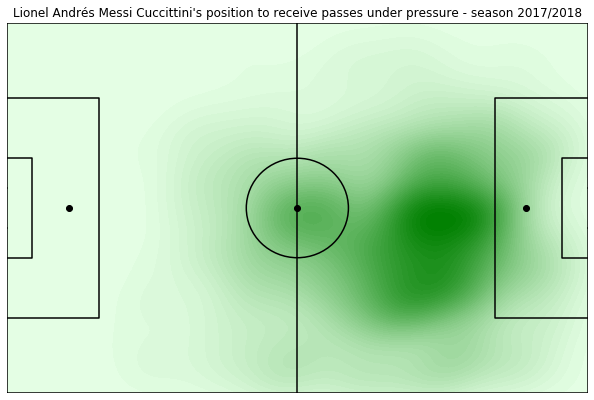

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

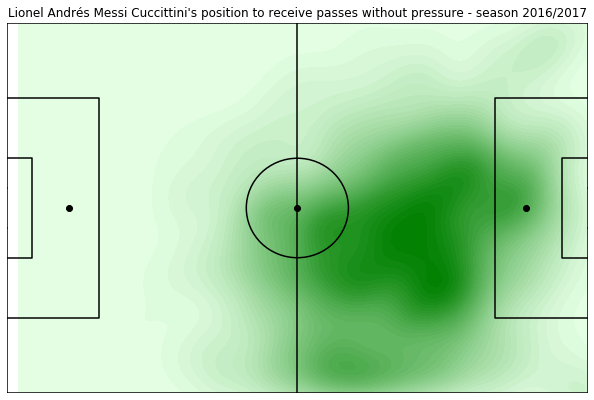

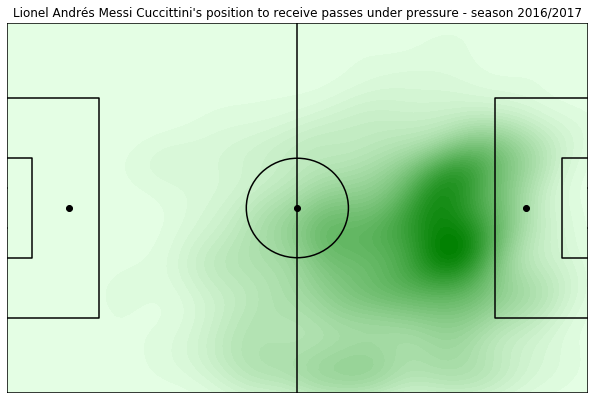

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

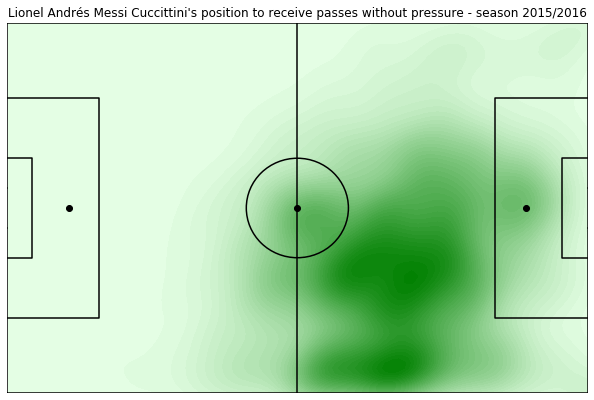

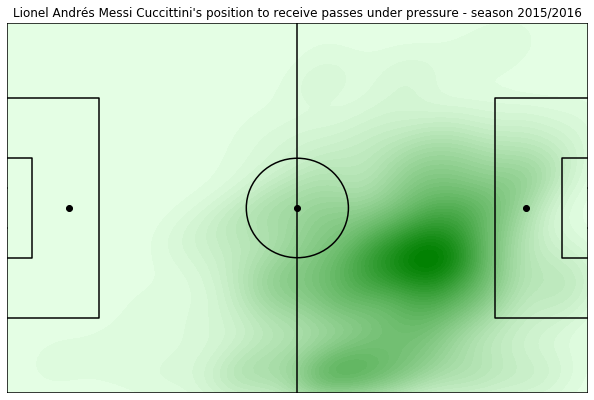

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

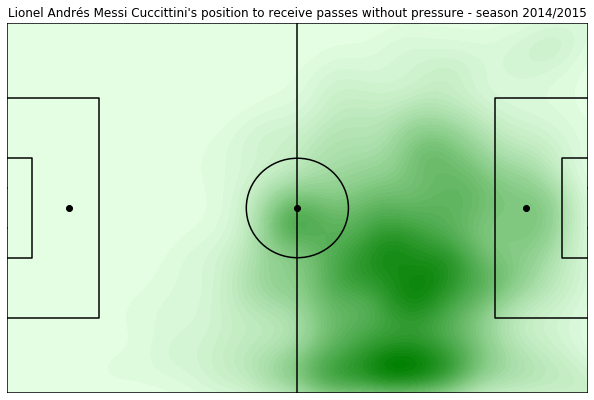

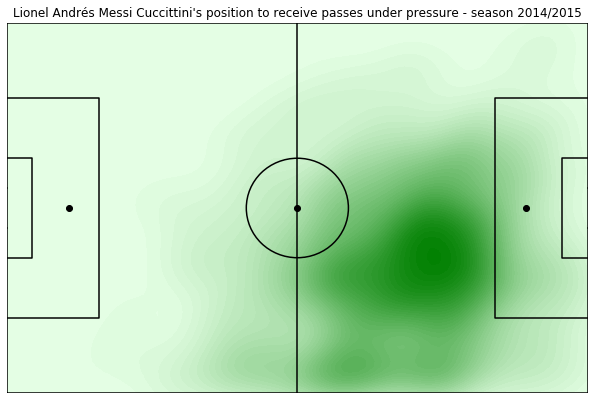

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

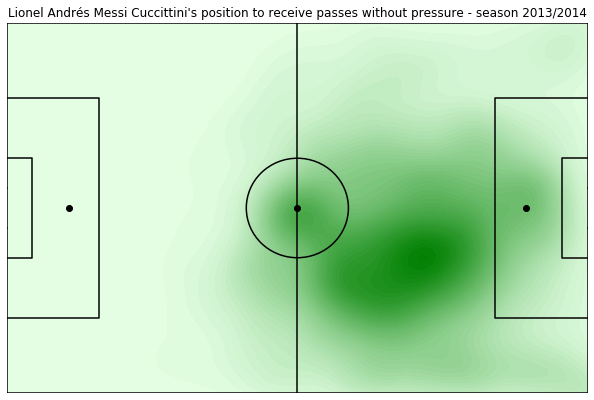

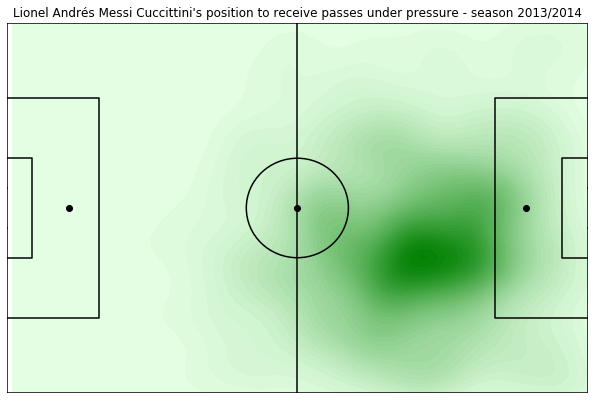

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

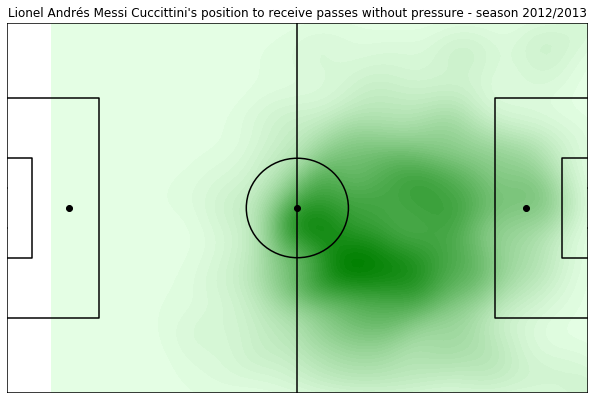

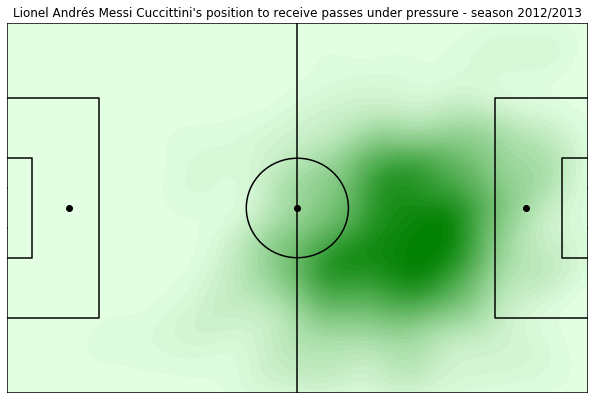

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

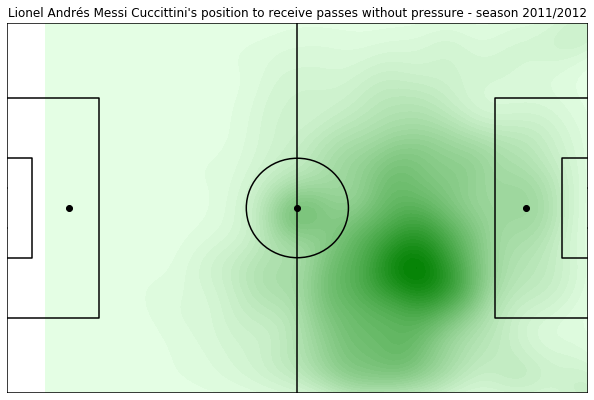

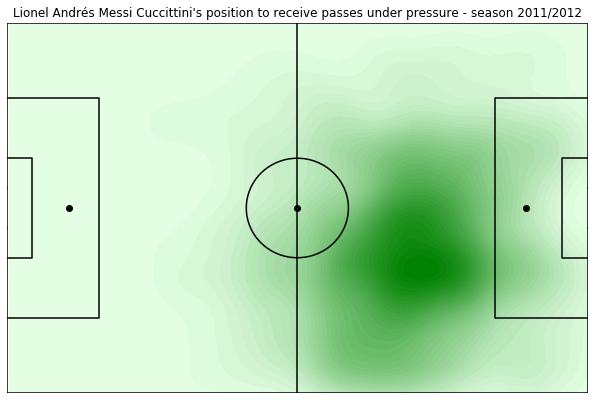

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

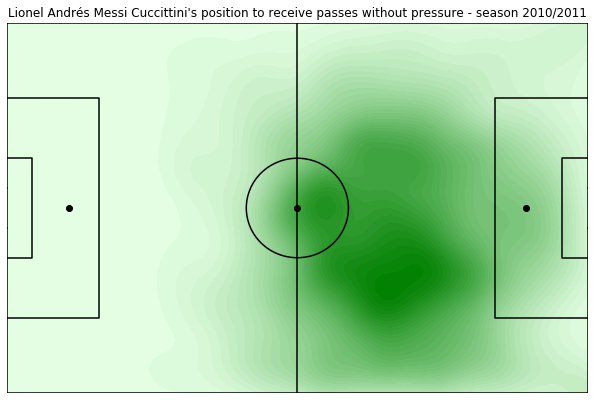

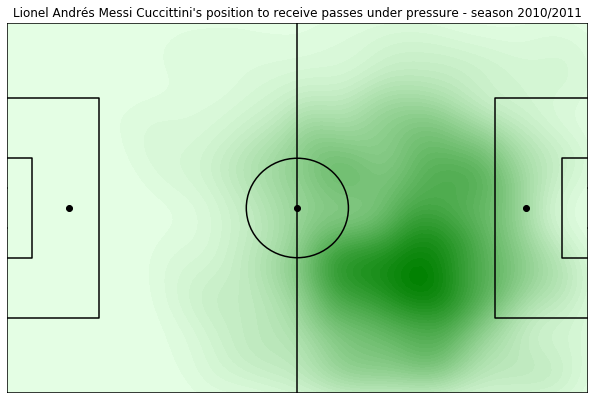

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

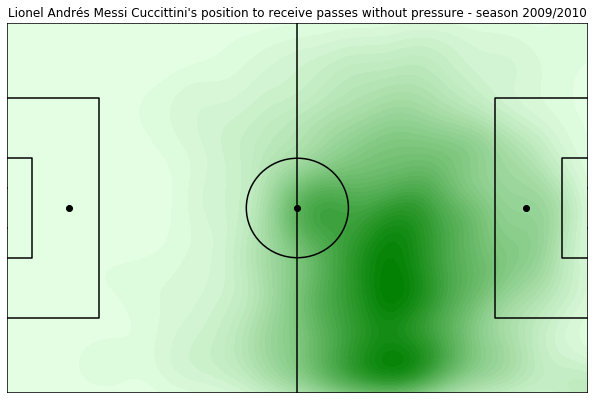

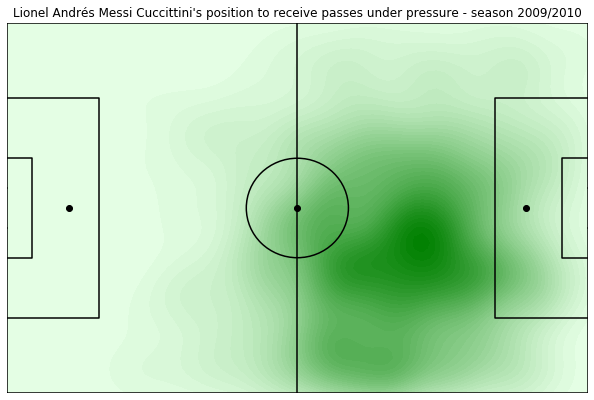

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

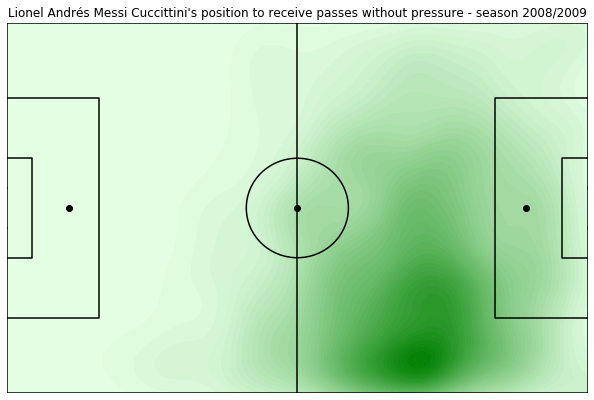

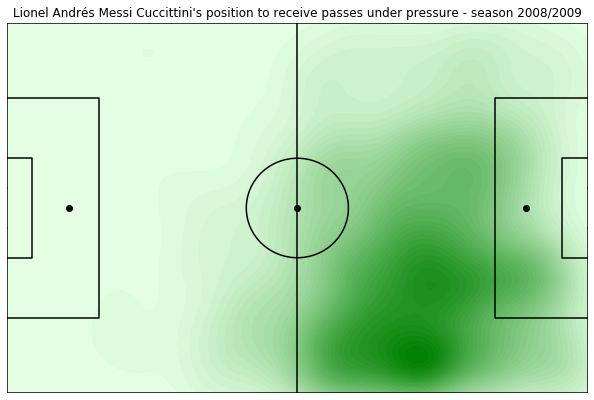

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

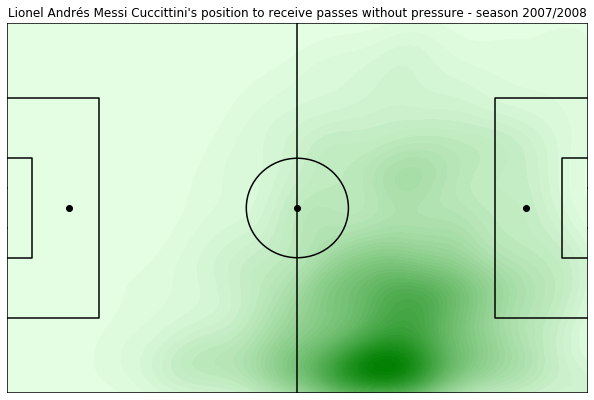

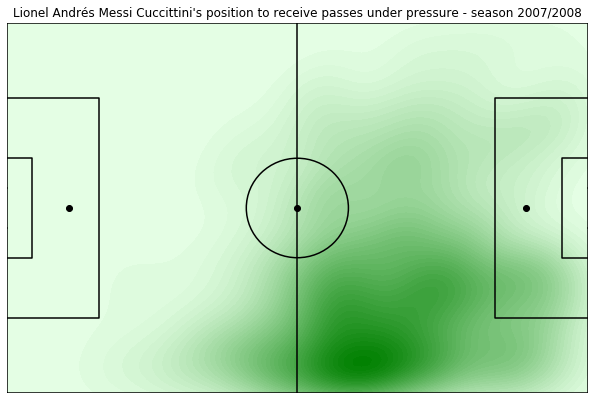

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

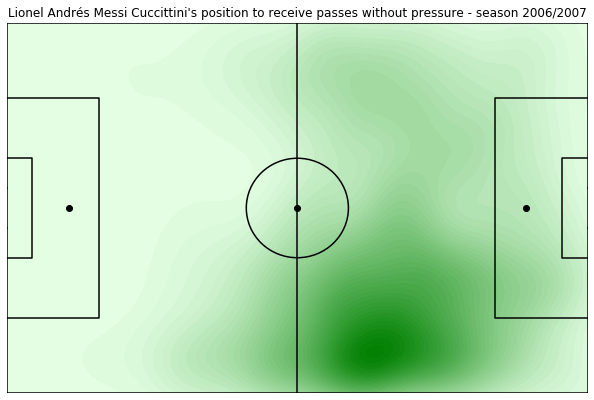

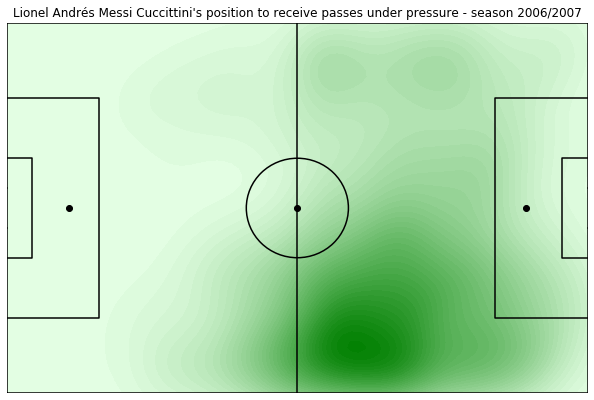

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

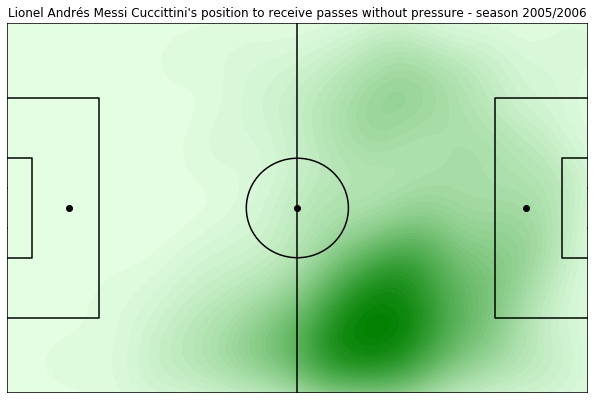

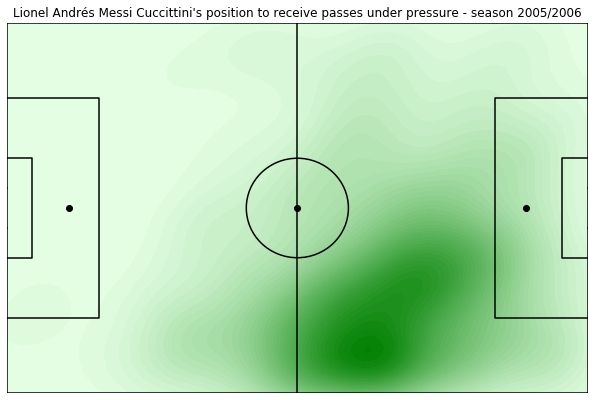

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


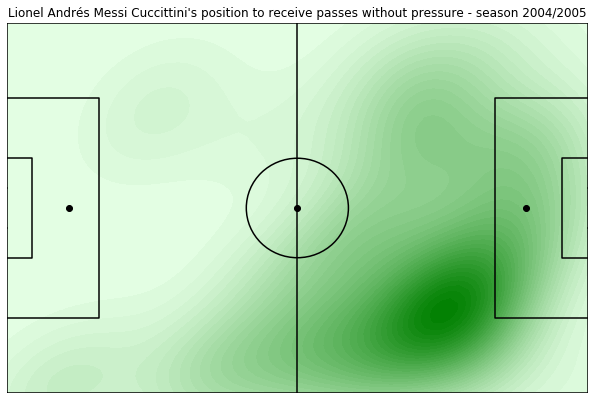

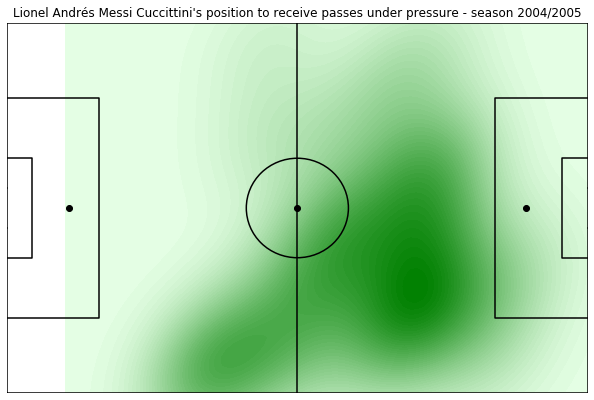

In [9]:
for season in la_liga.season_name :
    dic_competition = {
    "country": "Spain",
    "division": "La Liga",
    "season": season,
    "gender": "male"
    }
    
    la_liga_events = sb.competition_events(competition=dic_competition) 
    
    heatmap_pass_no_pressure(player_name = 'Lionel Andrés Messi Cuccittini', df_events = la_liga_events,
                            season = dic_competition['season'])
    heatmap_pass_under_pressure(player_name = 'Lionel Andrés Messi Cuccittini', df_events = la_liga_events,
                               season = dic_competition['season'])
    plt.show()